## Loading Dataset

first image idx: 29 corresponding to: /storage/remote/atcremers40/motion_seg/datasets/others/Opt_flow_pixel_preprocess/images/0021/0029.png


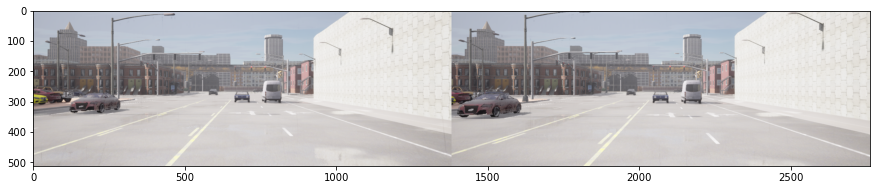

In [13]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import os
from numpy.matlib import repmat
import glob
import matplotlib.pyplot as plt
import json
from skimage import io
import cv2

from utils_data import get_flow, render_optical_flow_data, read_depth, plot_pair, plot_sparse_vecs

# data_root = "/storage/remote/atcremers40/motion_seg/datasets/Carla_unsupervised/"
# data_root = "/storage/remote/atcremers40/motion_seg/datasets/Opt_flow_change"
# data_root = "/storage/remote/atcremers40/motion_seg/datasets/Carla_Data_Collection/Depth_Test/"
data_root = "/storage/remote/atcremers40/motion_seg/datasets/others/Opt_flow_pixel_preprocess"
images = sorted(list(glob.glob(os.path.join(data_root, f"images/**/*.png"))))
transformations = sorted(list(glob.glob(os.path.join(data_root, f"transformations/**/*.json"))))
depths = sorted(list(glob.glob(os.path.join(data_root, f"depth/**/*.png"))))
first_image_idx = np.random.choice(range(len(images)-1))
first_image_idx = 29
print(f"first image idx: {first_image_idx} corresponding to: {images[first_image_idx]}")
offset = 1

img0 = plt.imread(images[first_image_idx])
img1 = plt.imread(images[first_image_idx+offset])
plot_pair(img0, img1)

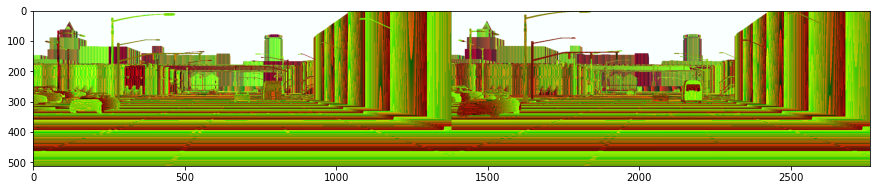

(512, 1382)


In [2]:
depth0 = plt.imread(depths[first_image_idx])
depth1 = plt.imread(depths[first_image_idx+offset])
plot_pair(depth0, depth1)

depth1 = read_depth(depths[first_image_idx+offset])
print(depth1.shape)

In [3]:
trs_list = []
for i in range(len(transformations)):
    with open(transformations[i], "r") as f:
        trs_list.extend(json.load(f)["transforms"])

trs = np.array(trs_list[first_image_idx + offset])
for i in range(offset-1,0, -1):
    trs = np.array(trs_list[first_image_idx + i]) @ trs
    
print(trs)

[[ 1.00000000e+00 -4.62356043e-18 -2.11508315e-22  1.42375661e+00]
 [ 3.18541573e-18  1.00000000e+00 -5.32632282e-07 -4.57423106e-05]
 [ 3.24194896e-25  5.32632282e-07  1.00000000e+00 -2.59646387e-06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


## Plot Static Flow

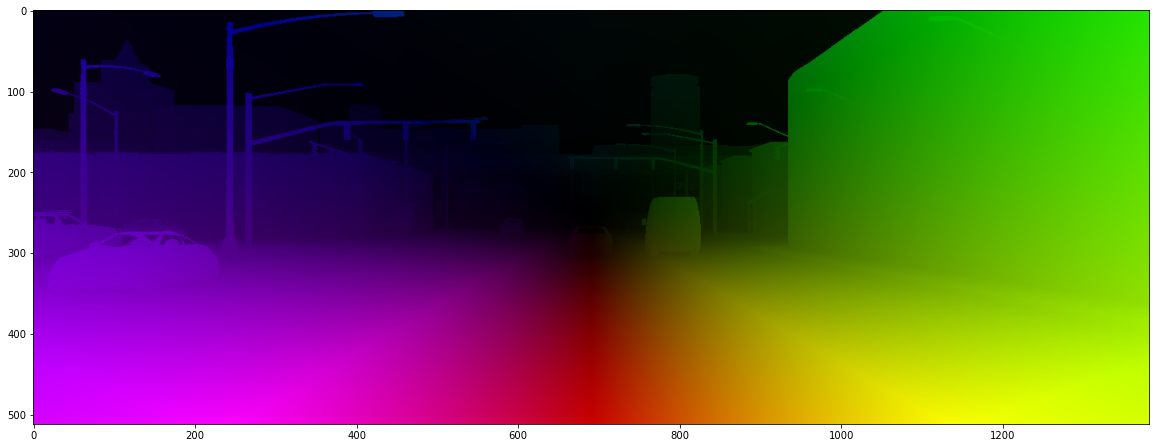

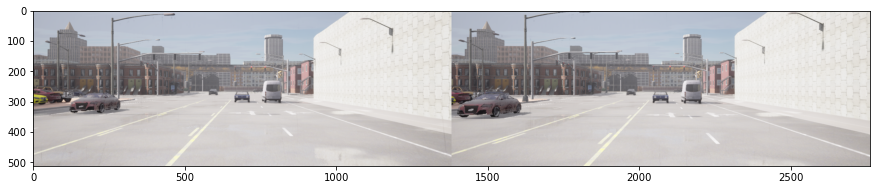

In [4]:
static_flow = get_flow(depth1, trs)
render_optical_flow_data(static_flow)
plot_pair(img0, img1)

## Plot Dynamic Flow

/storage/remote/atcremers40/motion_seg/datasets/others/Opt_flow_pixel_preprocess/opt_flow/0021/0030.pkl


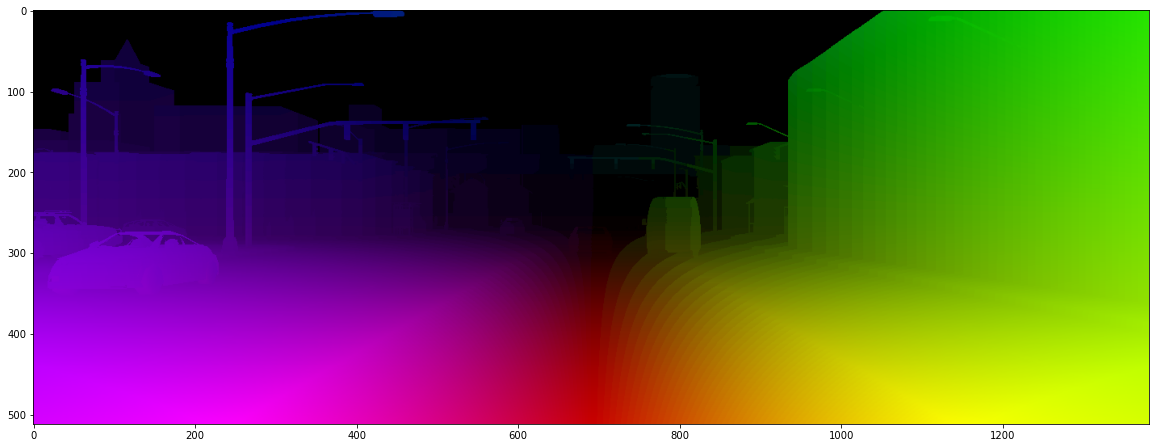

In [5]:
dynamic_flow_path = images[first_image_idx+offset].split("/")
dynamic_flow_path[-3] = "opt_flow"
dynamic_flow_path = "/".join(dynamic_flow_path)
dynamic_flow_path = dynamic_flow_path.split(".")[0] + ".pkl"
print(dynamic_flow_path)
dynamic_flow = np.load(dynamic_flow_path)
render_optical_flow_data(dynamic_flow)

## Plot discretized flow: Dynamic vs Static

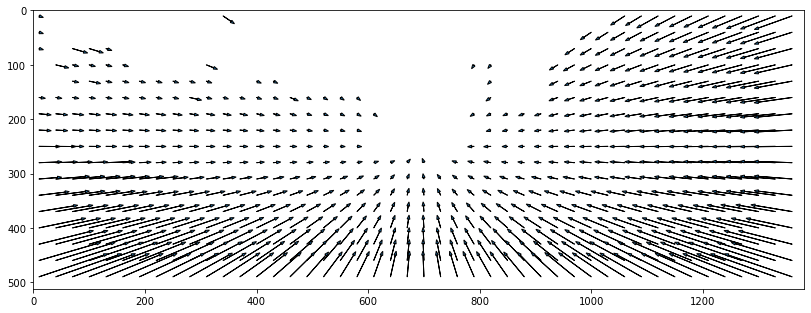

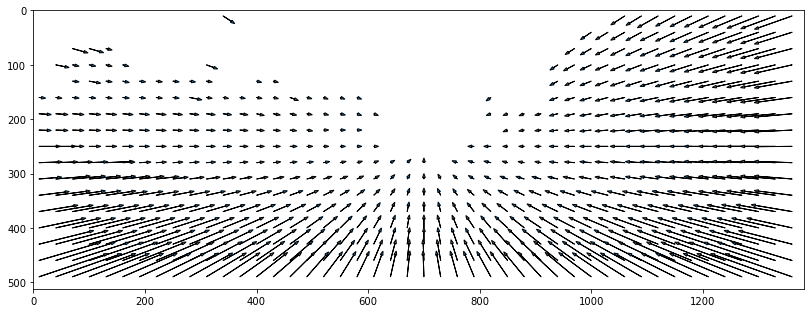

In [19]:
plot_sparse_vecs(static_flow)
plot_sparse_vecs(dynamic_flow)

## Plot $(u_s - u_d)^{2}$

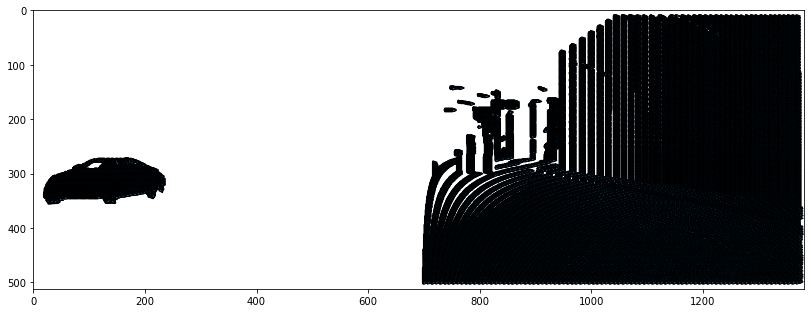

In [20]:
diff_flow = np.square(static_flow-dynamic_flow)
plot_sparse_vecs(diff_flow, sparseness=1, cutoff=1)